----------------------------------

# <span style="color:blueviolet"> 👩‍💻 DATA EDA <span style ="font-family:Papyrus;"> with python </span>
----------------------------------

<span style="background-color:#F5F5F5"> **🚩 강의 개요** <br> </span> 
- python 이 어떠한 언어인지 이해합니다. 
- python 의 library 의 개념을 이해하고 실습합니다. 
- kaggle dataset 을 활용한 전반적인 EDA 를 진행합니다.
- 모든 회차에서 실습 코드를 제공합니다.
- 이론 비중 30%, 코드실습 비중 70%

<span style="background-color:#F5F5F5"> **🚩 실습 커리큘럼** <br> </span> 
- python, 라이브러리 개념학습 및 실습환경 준비 
- python 활용 테이블 결합 ✅
- python 활용 데이터 이상치, 결측치 처리
- python 활용 데이터 시각화
</span> 
  

-----------------------------------

## <span style="color:red"> 📌 chapter 0. PYTHON 자료형 <br>
<br>

 <span style="color:blue">1. 기본 자료형</span>
- number: 정수와 실수 a = 1234
- string: 문자열 str1 = 'hi'
- boolean: 참(true) / 거짓(false) a = True

<span style="color:blue">2. 컬렉션 자료형</span>
- list : [] 대괄호로 정의, 수정가능, 순서 있음 list1 = [1, 2]
- tuple: () 소괄호로 정의, 수정불가, 순서 있음 tuple1 = (1, 2)
- dictionary: {} 중괄호로 정의, key와 value 값으로 나뉨, 수정가능, 순서 없음 dic = {"name": "jane", "age": 22, "grade": 'A'}
- set: {} 중괄호로 정의, 순서 없음, s = {1, 2, 3}

 <span style="color:blue">3. 라이브러리, 함수자료형</span>
- ndarray: numpy 에서 배열을 나타내주는 자료형
- series, dataframe:pandas 에서 사용하는 자료형
    - series: 1차원 배열, 일종의 리스트 형태, 정수, 문자열, 실수 등을 포함
    - dataframe: 2차원 배열, 여러개의 series 로 구성, 서로 다른 데이터타입을 칼럼으로 가질 수 있음 

## <span style="color:red"> 📌 chapter 1. Join, Merge, Concat, Append 의 이해

#### <span style="color:blue"> **📘 1-1. 라이브러리 import** </span>

In [66]:
import pandas as pd 
import numpy as np
import time
from PIL import Image

#### <span style="color:blue"> **📘 1-2. CSV 파일을 통한 테이블 LOAD** </span>

pandas 라이브러리를 활용한 csv 파일 읽기 

In [67]:
# pandas 라이브러리를 활용한 csv 파일 읽기 
df = pd.read_csv("product_details.csv") # product_details.csv
df2 = pd.read_csv("customer_details.csv") # customer_details.csv
df3 = pd.read_csv("E-commerece sales data 2024.csv") # E-commerece sales data 2024.csv

#### <span style="color:blue"> **📘 1-3. Merge** </span><br>
df2 의 Customer_id 가 df3 의 user_id 와 같은 의미를 가지고 있어요. <br>
merge함수는 공통컬럼의 이름이 달라도, 같아도 사용 할 수 있습니다. 

In [76]:
# 컬럼명이 같은 경우의 예시를 보여주기 위해 컬럼명을 임의로 변경해 줌
df3['Customer ID']=df3['user id']

In [77]:
# 컬럼명이 같을 경우, 아래와 같이 구현할 수 있습니다. 
# 디폴트값은 inner join 입니다.공통컬럼값이 합쳐져 하나의 컬럼으로 출력됩니다. 
merge_df = pd.merge(df2,df3)

#위 코드와 동일한 기능입니다. on 절을 사용할 수 있어요. 
merge_df = pd.merge(df2,df3, how='inner', on='Customer ID')

In [80]:
df2.shape,  df3.shape

((3900, 18), (3294, 6))

In [78]:
merge_df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,...,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,user id,product id,Interaction type,Time stamp,Unnamed: 4
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,...,Yes,Yes,14,Venmo,Fortnightly,1.0,4c69b61db1fc16e7013b43fc926e502d,purchase,10/10/2023 8:00,NaN
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,...,Yes,Yes,2,Cash,Fortnightly,2.0,66d49bbed043f5be260fa9f7fbff5957,view,11/10/2023 8:00,NaN
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,...,Yes,Yes,23,Credit Card,Weekly,3.0,2c55cae269aebf53838484b0d7dd931a,like,12/10/2023 8:00,NaN
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,...,Yes,Yes,49,PayPal,Weekly,4.0,18018b6bc416dab347b1b7db79994afa,view,13/10/2023 8:00,NaN
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,...,Yes,Yes,31,PayPal,Annually,5.0,e04b990e95bf73bbe6a3fa09785d7cd0,like,14/10/2023 8:00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2994,2995,69,Female,Sweater,Clothing,100,Nevada,S,White,Winter,...,No,No,14,Bank Transfer,Quarterly,2995.0,f5149cfb8e04d7b30bd7b4eaed6713b8,like,15/12/2023 8:00,NaN
2995,2996,29,Female,Jeans,Clothing,96,Virginia,M,Orange,Summer,...,No,No,42,Debit Card,Bi-Weekly,2996.0,82318e8acf79bbeb3cf685a2732fb630,view,16/12/2023 8:00,NaN
2996,2997,70,Female,Jewelry,Accessories,91,Utah,M,White,Spring,...,No,No,6,Venmo,Every 3 Months,2997.0,19d150365d798db47cccf1622b6ad754,purchase,17/12/2023 8:00,NaN
2997,2998,41,Female,Sweater,Clothing,40,Idaho,S,Yellow,Spring,...,No,No,14,Venmo,Every 3 Months,2998.0,136c0aff3ab56bd3d138775fe90ef970,view,18/12/2023 8:00,NaN


In [81]:
# 기준열 이름이 다를 때
merge_df = pd.merge(df2,df3, how='inner', left_on = 'Customer ID', right_on = 'user id')

In [82]:
merge_df

,Customer ID_x,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,...,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,user id,product id,Interaction type,Time stamp,Unnamed: 4,Customer ID_y
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,...,Yes,14,Venmo,Fortnightly,1.0,4c69b61db1fc16e7013b43fc926e502d,purchase,10/10/2023 8:00,NaN,1.0
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,...,Yes,2,Cash,Fortnightly,2.0,66d49bbed043f5be260fa9f7fbff5957,view,11/10/2023 8:00,NaN,2.0
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,...,Yes,23,Credit Card,Weekly,3.0,2c55cae269aebf53838484b0d7dd931a,like,12/10/2023 8:00,NaN,3.0
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,...,Yes,49,PayPal,Weekly,4.0,18018b6bc416dab347b1b7db79994afa,view,13/10/2023 8:00,NaN,4.0
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,...,Yes,31,PayPal,Annually,5.0,e04b990e95bf73bbe6a3fa09785d7cd0,like,14/10/2023 8:00,NaN,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2994,2995,69,Female,Sweater,Clothing,100,Nevada,S,White,Winter,...,No,14,Bank Transfer,Quarterly,2995.0,f5149cfb8e04d7b30bd7b4eaed6713b8,like,15/12/2023 8:00,NaN,2995.0
2995,2996,29,Female,Jeans,Clothing,96,Virginia,M,Orange,Summer,...,No,42,Debit Card,Bi-Weekly,2996.0,82318e8acf79bbeb3cf685a2732fb630,view,16/12/2023 8:00,NaN,2996.0
2996,2997,70,Female,Jewelry,Accessories,91,Utah,M,White,Spring,...,No,6,Venmo,Every 3 Months,2997.0,19d150365d798db47cccf1622b6ad754,purchase,17/12/2023 8:00,NaN,2997.0
2997,2998,41,Female,Sweater,Clothing,40,Idaho,S,Yellow,Spring,...,No,14,Venmo,Every 3 Months,2998.0,136c0aff3ab56bd3d138775fe90ef970,view,18/12/2023 8:00,NaN,2998.0


#### <span style="color:blue"> **📘 1-4. Join** </span>

In [83]:
df.columns

Index(['Uniqe Id', 'Product Name', 'Brand Name', 'Asin', 'Category',
       'Upc Ean Code', 'List Price', 'Selling Price', 'Quantity',
       'Model Number', 'About Product', 'Product Specification',
       'Technical Details', 'Shipping Weight', 'Product Dimensions', 'Image',
       'Variants', 'Sku', 'Product Url', 'Stock', 'Product Details',
       'Dimensions', 'Color', 'Ingredients', 'Direction To Use',
       'Is Amazon Seller', 'Size Quantity Variant', 'Product Description'],
      dtype='object')

In [84]:
df2.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

In [85]:
df3.columns

Index(['user id', 'product id', 'Interaction type', 'Time stamp', 'Unnamed: 4',
       'Customer ID'],
      dtype='object')

In [86]:
df.shape, df2.shape, df3.shape

((10002, 28), (3900, 18), (3294, 6))

In [87]:
# 아래 데이터프레임에서의 index는 0,1,2,3 ... 을 의미 
# 단순 조인
# 이름이 겹치는 컬럼이 없을 때 
# 축을 기준으로 합집합
df.join(df3)

,Uniqe Id,Product Name,Brand Name,Asin,Category,Upc Ean Code,List Price,Selling Price,Quantity,Model Number,...,Direction To Use,Is Amazon Seller,Size Quantity Variant,Product Description,user id,product id,Interaction type,Time stamp,Unnamed: 4,Customer ID
0,4c69b61db1fc16e7013b43fc926e502d,"DB Longboards CoreFlex Crossbow 41"" Bamboo Fib...",NaN,NaN,Sports & Outdoors | Outdoor Recreation | Skate...,NaN,NaN,$237.68,NaN,NaN,...,NaN,Y,NaN,NaN,1.0,4c69b61db1fc16e7013b43fc926e502d,purchase,10/10/2023 8:00,NaN,1.0
1,66d49bbed043f5be260fa9f7fbff5957,"Electronic Snap Circuits Mini Kits Classpack, ...",NaN,NaN,Toys & Games | Learning & Education | Science ...,NaN,NaN,$99.95,NaN,55324,...,NaN,Y,NaN,NaN,2.0,66d49bbed043f5be260fa9f7fbff5957,view,11/10/2023 8:00,NaN,2.0
2,2c55cae269aebf53838484b0d7dd931a,3Doodler Create Flexy 3D Printing Filament Ref...,NaN,NaN,Toys & Games | Arts & Crafts | Craft Kits,NaN,NaN,$34.99,NaN,NaN,...,NaN,Y,NaN,NaN,3.0,2c55cae269aebf53838484b0d7dd931a,like,12/10/2023 8:00,NaN,3.0
3,18018b6bc416dab347b1b7db79994afa,Guillow Airplane Design Studio with Travel Cas...,NaN,NaN,Toys & Games | Hobbies | Models & Model Kits |...,NaN,NaN,$28.91,NaN,142,...,NaN,Y,NaN,NaN,4.0,18018b6bc416dab347b1b7db79994afa,view,13/10/2023 8:00,NaN,4.0
4,e04b990e95bf73bbe6a3fa09785d7cd0,Woodstock- Collage 500 pc Puzzle,NaN,NaN,Toys & Games | Puzzles | Jigsaw Puzzles,NaN,NaN,$17.49,NaN,62151,...,NaN,Y,NaN,NaN,5.0,e04b990e95bf73bbe6a3fa09785d7cd0,like,14/10/2023 8:00,NaN,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9997,1a22f23576bfdfe5ed6c887dc117aab6,Remedia Publications REM536B Money Activity Bo...,NaN,NaN,Toys & Games | Learning & Education | Counting...,NaN,NaN,$9.31,NaN,REM536B,...,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9998,e11514dcf1f087887cd5ea0bd646d1fc,Trends International NFL La Chargers HG - Mobi...,NaN,NaN,Toys & Games | Arts & Crafts,NaN,NaN,$6.99,NaN,NaN,...,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9999,c00301a38560da2abc89c1f86ce4b267,NewPath Learning 10 Piece Science Owls and Owl...,NaN,NaN,Office Products | Office & School Supplies | E...,NaN,NaN,$37.95,NaN,34-6015,...,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10000,c2928dbf9796ceba44863a2736afb405,Disney Princess Do It Yourself Braid Set,NaN,NaN,Toys & Games | Arts & Crafts | Craft Kits,NaN,NaN,$3.58,NaN,2888PRST,...,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# join 방식 설정
df.join(df3, how='right')

,Uniqe Id,Product Name,Brand Name,Asin,Category,Upc Ean Code,List Price,Selling Price,Quantity,Model Number,...,Direction To Use,Is Amazon Seller,Size Quantity Variant,Product Description,user id,product id,Interaction type,Time stamp,Unnamed: 4,Customer ID
0,4c69b61db1fc16e7013b43fc926e502d,"DB Longboards CoreFlex Crossbow 41"" Bamboo Fib...",NaN,NaN,Sports & Outdoors | Outdoor Recreation | Skate...,NaN,NaN,$237.68,NaN,NaN,...,NaN,Y,NaN,NaN,1.0,4c69b61db1fc16e7013b43fc926e502d,purchase,10/10/2023 8:00,NaN,1.0
1,66d49bbed043f5be260fa9f7fbff5957,"Electronic Snap Circuits Mini Kits Classpack, ...",NaN,NaN,Toys & Games | Learning & Education | Science ...,NaN,NaN,$99.95,NaN,55324,...,NaN,Y,NaN,NaN,2.0,66d49bbed043f5be260fa9f7fbff5957,view,11/10/2023 8:00,NaN,2.0
2,2c55cae269aebf53838484b0d7dd931a,3Doodler Create Flexy 3D Printing Filament Ref...,NaN,NaN,Toys & Games | Arts & Crafts | Craft Kits,NaN,NaN,$34.99,NaN,NaN,...,NaN,Y,NaN,NaN,3.0,2c55cae269aebf53838484b0d7dd931a,like,12/10/2023 8:00,NaN,3.0
3,18018b6bc416dab347b1b7db79994afa,Guillow Airplane Design Studio with Travel Cas...,NaN,NaN,Toys & Games | Hobbies | Models & Model Kits |...,NaN,NaN,$28.91,NaN,142,...,NaN,Y,NaN,NaN,4.0,18018b6bc416dab347b1b7db79994afa,view,13/10/2023 8:00,NaN,4.0
4,e04b990e95bf73bbe6a3fa09785d7cd0,Woodstock- Collage 500 pc Puzzle,NaN,NaN,Toys & Games | Puzzles | Jigsaw Puzzles,NaN,NaN,$17.49,NaN,62151,...,NaN,Y,NaN,NaN,5.0,e04b990e95bf73bbe6a3fa09785d7cd0,like,14/10/2023 8:00,NaN,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3289,e604fb2982f1a80bd6279672ca0d2c80,Waterbabies Bathtime Fun Unicorn CA,NaN,NaN,Toys & Games | Dolls & Accessories | Dolls,NaN,NaN,$19.99,NaN,69148,...,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3290,897f8de53a55f184c715e3f5b8b50699,Trends International Peppa Pig - Mini STICKERL...,NaN,NaN,Toys & Games | Arts & Crafts | Stickers,NaN,NaN,$7.51,NaN,NaN,...,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3291,10079831443693663c42e1df7eb3f7bc,Edu-Toys Mobile 20/30/40x Telescope,NaN,NaN,Toys & Games | Learning & Education | Optics |...,NaN,NaN,$22.99,NaN,EDU-41005,...,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3292,e93070bd9e753a43a260c79321e19289,Trend Enterprises Inc T-53905 Time and Money S...,NaN,NaN,NaN,NaN,NaN,$20.90,NaN,T-53905,...,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [93]:
# join시 이름이 같은 컬럼이 있을 경우, 옵션으로 설정하여 조인 가능
#df.join(df2) 
df.join(df2,how='left', lsuffix='이햐', rsuffix='바보')

,Uniqe Id,Product Name,Brand Name,Asin,Category이햐,Upc Ean Code,List Price,Selling Price,Quantity,Model Number,...,Color바보,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,4c69b61db1fc16e7013b43fc926e502d,"DB Longboards CoreFlex Crossbow 41"" Bamboo Fib...",NaN,NaN,Sports & Outdoors | Outdoor Recreation | Skate...,NaN,NaN,$237.68,NaN,NaN,...,Gray,Winter,3.1,Yes,Express,Yes,Yes,14.0,Venmo,Fortnightly
1,66d49bbed043f5be260fa9f7fbff5957,"Electronic Snap Circuits Mini Kits Classpack, ...",NaN,NaN,Toys & Games | Learning & Education | Science ...,NaN,NaN,$99.95,NaN,55324,...,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2.0,Cash,Fortnightly
2,2c55cae269aebf53838484b0d7dd931a,3Doodler Create Flexy 3D Printing Filament Ref...,NaN,NaN,Toys & Games | Arts & Crafts | Craft Kits,NaN,NaN,$34.99,NaN,NaN,...,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23.0,Credit Card,Weekly
3,18018b6bc416dab347b1b7db79994afa,Guillow Airplane Design Studio with Travel Cas...,NaN,NaN,Toys & Games | Hobbies | Models & Model Kits |...,NaN,NaN,$28.91,NaN,142,...,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49.0,PayPal,Weekly
4,e04b990e95bf73bbe6a3fa09785d7cd0,Woodstock- Collage 500 pc Puzzle,NaN,NaN,Toys & Games | Puzzles | Jigsaw Puzzles,NaN,NaN,$17.49,NaN,62151,...,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31.0,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9997,1a22f23576bfdfe5ed6c887dc117aab6,Remedia Publications REM536B Money Activity Bo...,NaN,NaN,Toys & Games | Learning & Education | Counting...,NaN,NaN,$9.31,NaN,REM536B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9998,e11514dcf1f087887cd5ea0bd646d1fc,Trends International NFL La Chargers HG - Mobi...,NaN,NaN,Toys & Games | Arts & Crafts,NaN,NaN,$6.99,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9999,c00301a38560da2abc89c1f86ce4b267,NewPath Learning 10 Piece Science Owls and Owl...,NaN,NaN,Office Products | Office & School Supplies | E...,NaN,NaN,$37.95,NaN,34-6015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10000,c2928dbf9796ceba44863a2736afb405,Disney Princess Do It Yourself Braid Set,NaN,NaN,Toys & Games | Arts & Crafts | Craft Kits,NaN,NaN,$3.58,NaN,2888PRST,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# join 이후, 인덱스 정렬하기
df.join(df2,how='left', lsuffix='1', rsuffix='2', sort=True)

,Uniqe Id,Product Name,Brand Name,Asin,Category1,Upc Ean Code,List Price,Selling Price,Quantity,Model Number,...,Color2,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,4c69b61db1fc16e7013b43fc926e502d,"DB Longboards CoreFlex Crossbow 41"" Bamboo Fib...",NaN,NaN,Sports & Outdoors | Outdoor Recreation | Skate...,NaN,NaN,$237.68,NaN,NaN,...,Gray,Winter,3.1,Yes,Express,Yes,Yes,14.0,Venmo,Fortnightly
1,66d49bbed043f5be260fa9f7fbff5957,"Electronic Snap Circuits Mini Kits Classpack, ...",NaN,NaN,Toys & Games | Learning & Education | Science ...,NaN,NaN,$99.95,NaN,55324,...,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2.0,Cash,Fortnightly
2,2c55cae269aebf53838484b0d7dd931a,3Doodler Create Flexy 3D Printing Filament Ref...,NaN,NaN,Toys & Games | Arts & Crafts | Craft Kits,NaN,NaN,$34.99,NaN,NaN,...,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23.0,Credit Card,Weekly
3,18018b6bc416dab347b1b7db79994afa,Guillow Airplane Design Studio with Travel Cas...,NaN,NaN,Toys & Games | Hobbies | Models & Model Kits |...,NaN,NaN,$28.91,NaN,142,...,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49.0,PayPal,Weekly
4,e04b990e95bf73bbe6a3fa09785d7cd0,Woodstock- Collage 500 pc Puzzle,NaN,NaN,Toys & Games | Puzzles | Jigsaw Puzzles,NaN,NaN,$17.49,NaN,62151,...,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31.0,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9997,1a22f23576bfdfe5ed6c887dc117aab6,Remedia Publications REM536B Money Activity Bo...,NaN,NaN,Toys & Games | Learning & Education | Counting...,NaN,NaN,$9.31,NaN,REM536B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9998,e11514dcf1f087887cd5ea0bd646d1fc,Trends International NFL La Chargers HG - Mobi...,NaN,NaN,Toys & Games | Arts & Crafts,NaN,NaN,$6.99,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9999,c00301a38560da2abc89c1f86ce4b267,NewPath Learning 10 Piece Science Owls and Owl...,NaN,NaN,Office Products | Office & School Supplies | E...,NaN,NaN,$37.95,NaN,34-6015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10000,c2928dbf9796ceba44863a2736afb405,Disney Princess Do It Yourself Braid Set,NaN,NaN,Toys & Games | Arts & Crafts | Craft Kits,NaN,NaN,$3.58,NaN,2888PRST,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### <span style="color:blue"> **📘 1-5. Concat** </span>

In [95]:
df2.shape, df3.shape

((3900, 18), (3294, 6))

In [96]:
3900+3294

7194

In [98]:
# 디폴트 값: 수직결합
# axis=1 수평 / axis=0 수직
#ignore_index=True : 인덱스 재배열
#join='inner' : null값(행과 열 등이 맞지 않아 생기는 NaN)을 제외한 교집합
pd.concat([df2, df3])

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,...,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,user id,product id,Interaction type,Time stamp,Unnamed: 4
0,1.0,55.0,Male,Blouse,Clothing,53.0,Kentucky,L,Gray,Winter,...,Yes,Yes,14.0,Venmo,Fortnightly,NaN,NaN,NaN,NaN,NaN
1,2.0,19.0,Male,Sweater,Clothing,64.0,Maine,L,Maroon,Winter,...,Yes,Yes,2.0,Cash,Fortnightly,NaN,NaN,NaN,NaN,NaN
2,3.0,50.0,Male,Jeans,Clothing,73.0,Massachusetts,S,Maroon,Spring,...,Yes,Yes,23.0,Credit Card,Weekly,NaN,NaN,NaN,NaN,NaN
3,4.0,21.0,Male,Sandals,Footwear,90.0,Rhode Island,M,Maroon,Spring,...,Yes,Yes,49.0,PayPal,Weekly,NaN,NaN,NaN,NaN,NaN
4,5.0,45.0,Male,Blouse,Clothing,49.0,Oregon,M,Turquoise,Spring,...,Yes,Yes,31.0,PayPal,Annually,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3289,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3290,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3291,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [103]:
# 세로로 결합
# inner join 
pd.concat([df2, df3], axis=0, ignore_index=True, join='inner')

,Customer ID
0,1.0
1,2.0
2,3.0
3,4.0
4,5.0
...,...
7189,NaN
7190,NaN
7191,NaN
7192,NaN


In [18]:
# 가로로 결합
pd.concat([df2, df3], axis=1, ignore_index=True, join='inner')

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,...,Yes,14,Venmo,Fortnightly,1.0,4c69b61db1fc16e7013b43fc926e502d,purchase,10/10/2023 8:00,NaN,1.0
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,...,Yes,2,Cash,Fortnightly,2.0,66d49bbed043f5be260fa9f7fbff5957,view,11/10/2023 8:00,NaN,2.0
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,...,Yes,23,Credit Card,Weekly,3.0,2c55cae269aebf53838484b0d7dd931a,like,12/10/2023 8:00,NaN,3.0
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,...,Yes,49,PayPal,Weekly,4.0,18018b6bc416dab347b1b7db79994afa,view,13/10/2023 8:00,NaN,4.0
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,...,Yes,31,PayPal,Annually,5.0,e04b990e95bf73bbe6a3fa09785d7cd0,like,14/10/2023 8:00,NaN,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3289,3290,31,Female,Backpack,Accessories,50,Montana,M,Maroon,Summer,...,No,16,Venmo,Every 3 Months,NaN,NaN,NaN,NaN,NaN,NaN
3290,3291,52,Female,Coat,Outerwear,82,North Dakota,L,Black,Spring,...,No,2,PayPal,Monthly,NaN,NaN,NaN,NaN,NaN,NaN
3291,3292,29,Female,Belt,Accessories,51,New Mexico,L,Olive,Fall,...,No,11,Cash,Monthly,NaN,NaN,NaN,NaN,NaN,NaN
3292,3293,62,Female,Handbag,Accessories,23,Missouri,L,Gray,Spring,...,No,18,Bank Transfer,Fortnightly,NaN,NaN,NaN,NaN,NaN,NaN


#### <span style="color:blue"> **📘 1-6. APPEND** </span>

In [107]:
# 기능이 없어질 예정으로 아래와 같이 concat 으로 변경하여 실행해주시면 됩니다. 
# 에러가 아닌 경고메시지로, 이를 무시하고 싶다면 아래와 같은 코드를 입력해주시면 됩니다.
# import warnings
# warnings.filterwarnings('ignore')
# 단순 결합, 없는 건 NaN으로 처리되고 결합
# df2 가 df 의 아래로 붙음
# df.append(df2)
# pd.concat([df, df2])

---------------------------------

## <span style="color:red"> 📌 chapter 2. Pivot Table 구현하기

In [108]:
df2

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly


In [114]:
# age 라는 축을 기준으로 카테고리별 고객id 카운트 
pd.pivot_table(df2, index='Subscription Status', columns='Category', values='Customer ID', aggfunc='count')

Category,Accessories,Clothing,Footwear,Outerwear
Subscription Status,,,,
No,906,1280,428,233
Yes,334,457,171,91


In [118]:
# age, Category 라는 축을 기준으로 성별 Previous Purchases 최소, 최대값 구하기 
pd.pivot_table(df2, index=['Age','Category'],columns='Gender', values='Previous Purchases', aggfunc=['min','max','mean','median'])

min          max             mean            median      
Gender          Female  Male Female  Male     Female       Male Female  Male
Age Category                                                                
18  Accessories    1.0   6.0   48.0  46.0  20.333333  22.666667   10.0  19.0
    Clothing       2.0   1.0   21.0  48.0  10.625000  21.720000   10.5  23.0
    Footwear      41.0   4.0   41.0  36.0  41.000000  19.000000   41.0  20.0
    Outerwear     23.0   3.0   32.0  48.0  27.500000  25.875000   27.5  26.0
19  Accessories    2.0   1.0   50.0  48.0  30.666667  25.375000   34.0  23.5
...                ...   ...    ...   ...        ...        ...    ...   ...
69  Outerwear      3.0  16.0   19.0  37.0  11.000000  28.333333   11.0  32.0
70  Accessories    1.0  12.0   30.0  50.0  13.272727  31.142857   15.0  36.0
    Clothing       4.0   2.0   43.0  50.0  21.285714  25.789474   15.0  20.0
    Footwear      12.0   2.0   42.0  40.0  32.500000  26.750000   38.0  29.0
    Outerwear      NaN   9.0    NaN  26.0        NaN  19.250000    NaN  21.0

[212 rows x 8 columns]

In [23]:
# 성별을 축으로 하고, 사이즈, 나이별 고객id 고유하게 카운트 
pd.pivot_table(df2, index=['Gender'],columns=['Size','Age'], values='Customer ID', aggfunc='nunique')

Size       L                                                       ...   XL  \
Age       18   19    20    21    22    23    24    25    26    27  ...   61   
Gender                                                             ...        
Female   3.0  8.0   NaN   6.0   4.0  11.0   7.0   3.0   8.0   3.0  ...  1.0   
Male    11.0  8.0  12.0  18.0  10.0  10.0  13.0  17.0  16.0  12.0  ...  4.0   

Size                                                 
Age      62   63   64   65   66   67   68   69   70  
Gender                                               
Female  4.0  4.0  3.0  1.0  3.0  3.0  1.0  1.0  2.0  
Male    6.0  7.0  6.0  7.0  2.0  2.0  2.0  9.0  4.0  

[2 rows x 212 columns]

## <span style="color:red"> 📌 chapter 3. 그 외 유용한 메서드 소개

#### <span style="color:blue"> **📘 3-1. lambda** </span>

In [119]:
#lambda 함수를 이용한 홀수 출력하기 
mylist = [1, 2, 3, 4, 5]
mylist2 = list(filter(lambda x: x % 2 == 1, mylist))
mylist2

[1, 3, 5]

In [26]:
#lambda 함수를 이용한 정렬
# sorted 는 python 내장함수입니다. 
mylist = ['apple', 'banana', 'cherrycherry','kiwi','orange','watermellon']
mylist2 = sorted(mylist, key=lambda x: len(x))
mylist2

['kiwi', 'apple', 'banana', 'orange', 'watermellon', 'cherrycherry']

#### <span style="color:blue"> **📘 3-2. split** </span>

In [120]:
# 예시 문자열 선언 
s = "aa.bb.cc.dd.ee.ff.gg"

In [28]:
# '.' 구분자를 기준으로 데이터를 나눔 
# 아래 두 코드 결과 동일 
s.split('.')
s.split(sep='.')

['aa', 'bb', 'cc', 'dd', 'ee', 'ff', 'gg']

In [123]:
# '.' 구분자를 기준으로 데이터를 나누고 컬럼으로 받음 
# lambda 함수와 결합하여 사용하는 경우 
df2['x']="aa.bb.cc.dd.ee.ff.gg"

In [125]:
df2

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,x
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly,aa.bb.cc.dd.ee.ff.gg
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly,aa.bb.cc.dd.ee.ff.gg
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly,aa.bb.cc.dd.ee.ff.gg
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly,aa.bb.cc.dd.ee.ff.gg
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually,aa.bb.cc.dd.ee.ff.gg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly,aa.bb.cc.dd.ee.ff.gg
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly,aa.bb.cc.dd.ee.ff.gg
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly,aa.bb.cc.dd.ee.ff.gg
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly,aa.bb.cc.dd.ee.ff.gg


In [126]:
# split 이해하기 - 단일 문자열
st="aa.bb.cc.dd.ee.ff.gg"

In [127]:
# split 이해하기 - 단일 문자열
st.split('.')

['aa', 'bb', 'cc', 'dd', 'ee', 'ff', 'gg']

In [129]:
# split 이해하기 - 단일 문자열
st.split('.')[6]

'gg'

In [34]:
# split 이해하기 - Series 
# [] 슬라이싱 기능
df2['x']

0       aa.bb.cc.dd.ee.ff.gg
1       aa.bb.cc.dd.ee.ff.gg
2       aa.bb.cc.dd.ee.ff.gg
3       aa.bb.cc.dd.ee.ff.gg
4       aa.bb.cc.dd.ee.ff.gg
                ...         
3895    aa.bb.cc.dd.ee.ff.gg
3896    aa.bb.cc.dd.ee.ff.gg
3897    aa.bb.cc.dd.ee.ff.gg
3898    aa.bb.cc.dd.ee.ff.gg
3899    aa.bb.cc.dd.ee.ff.gg
Name: x, Length: 3900, dtype: object

In [134]:
df2['Location'][1]

'Maine'

In [141]:
# split 이해하기 - Series 
df2['x'][0].split('.')[6]

'gg'

In [36]:
# split 이해하기 - Series 
len(df2['x'][0].split('.'))

7

In [171]:
# 데이터프레임의 특정 컬럼에 대해 일괄적으로 변경을 위한 apply 함수 호출 
# 7번 반복, a 를 컬럼 구분자로 받아주고, format 함수를 통해 a0, a1, a2 ... 로 표기
# lambda 함수를 통해 '.' 로 구분. 단, len(x.split('.') 즉 7 보다 i 가 작을 때 수행
for i in range(7):
    df2["명수{}".format(i)] = df2['x'].apply(lambda x: x.split('.')[i] if len(x.split('.'))>i else None)

In [ ]:
def plus(a,g):
    if 
        return 

In [ ]:
inline(one line) if  결과값 조건 
특징: elif 쓸 수 없음 
    

In [ ]:
# 데이터프레임의 특정 컬럼에 대해 일괄적으로 변경을 위한 apply 함수 호출 

# 7번 반복, a 를 컬럼 구분자로 받아주고, format 함수를 통해 a0, a1, a2 ... 로 표기
# lambda 함수를 통해 '.' 로 구분. 단, len(x.split('.') 즉 7 보다 i 가 작을 때 수행
for i in range(7):
    df2["d{}".format(i)] = df2['x'].apply(lambda x: 결과값 if 7>i else None)

In [170]:
df2

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,...,c6,명수0,명수1,명수2,명수3,명수4,명수5,명수6,명수[],명수()
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,...,gg,aa,bb,cc,dd,ee,ff,gg,gg,gg
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,...,gg,aa,bb,cc,dd,ee,ff,gg,gg,gg
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,...,gg,aa,bb,cc,dd,ee,ff,gg,gg,gg
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,...,gg,aa,bb,cc,dd,ee,ff,gg,gg,gg
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,...,gg,aa,bb,cc,dd,ee,ff,gg,gg,gg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,...,gg,aa,bb,cc,dd,ee,ff,gg,gg,gg
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,...,gg,aa,bb,cc,dd,ee,ff,gg,gg,gg
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,...,gg,aa,bb,cc,dd,ee,ff,gg,gg,gg
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,...,gg,aa,bb,cc,dd,ee,ff,gg,gg,gg


#### <span style="color:blue"> **📘 3-3. rrule** </span>

In [152]:
df3['Time stamp'] 

0       10/10/2023 8:00
1       11/10/2023 8:00
2       12/10/2023 8:00
3       13/10/2023 8:00
4       14/10/2023 8:00
             ...       
3289                NaN
3290                NaN
3291                NaN
3292                NaN
3293                NaN
Name: Time stamp, Length: 3294, dtype: object

In [157]:
# 라이브러리 불러오기
from datetime import datetime
from dateutil.rrule import rrule, WEEKLY

# 시작 날짜, 종료날짜
start_date = datetime(2023, 2, 1)
end_date = datetime(2023, 3, 1)

# 2023-02-01 부터 2023-03-01 까지 strf 사용하여 원하는 데이터 형식으로 출력.
daily_rule = rrule(WEEKLY, dtstart=datetime(2023, 2, 1), until=datetime(2023, 3, 1))

# 생성된 날짜 출력
for date in daily_rule:
    print(date.strftime('%Y:%m-%d'))

2023:02-01
2023:02-08
2023:02-15
2023:02-22
2023:03-01


#### <span style="color:blue"> **📘 3-4. 데이터프레임에서 특정 날짜기간에 해당하는 데이터만 슬라이싱 하기** </span>

In [158]:
# 2023-02-01 부터 2023-03-01 까지 strf 사용하여 원하는 데이터 형식으로 출력.
weekly_rule = rrule(DAILY, dtstart=start_date, until=end_date)
# 빈 리스트 생성 후 날짜를 담아주기
a=[]
for date in weekly_rule:
    a.append(date.strftime('%Y-%m-%d'))

In [159]:
a

['2023-02-01',
 '2023-02-02',
 '2023-02-03',
 '2023-02-04',
 '2023-02-05',
 '2023-02-06',
 '2023-02-07',
 '2023-02-08',
 '2023-02-09',
 '2023-02-10',
 '2023-02-11',
 '2023-02-12',
 '2023-02-13',
 '2023-02-14',
 '2023-02-15',
 '2023-02-16',
 '2023-02-17',
 '2023-02-18',
 '2023-02-19',
 '2023-02-20',
 '2023-02-21',
 '2023-02-22',
 '2023-02-23',
 '2023-02-24',
 '2023-02-25',
 '2023-02-26',
 '2023-02-27',
 '2023-02-28',
 '2023-03-01']

In [160]:
# df3 에 있는 날짜 데이터는 string 
# string -> datetimd -> string 의 형태로 변환
# 위에서 받은 리스트에 해당하는 데이터만 필터링하기 위함 
df3['Time stamp2'] = pd.to_datetime(df3['Time stamp']).dt.strftime('%Y-%m-%d')

In [164]:
mask =(df3['Time stamp2'].isin(a))

In [165]:
df3

,user id,product id,Interaction type,Time stamp,Unnamed: 4,Customer ID,Time stamp2
0,1.0,4c69b61db1fc16e7013b43fc926e502d,purchase,10/10/2023 8:00,NaN,1.0,2023-10-10
1,2.0,66d49bbed043f5be260fa9f7fbff5957,view,11/10/2023 8:00,NaN,2.0,2023-11-10
2,3.0,2c55cae269aebf53838484b0d7dd931a,like,12/10/2023 8:00,NaN,3.0,2023-12-10
3,4.0,18018b6bc416dab347b1b7db79994afa,view,13/10/2023 8:00,NaN,4.0,2023-10-13
4,5.0,e04b990e95bf73bbe6a3fa09785d7cd0,like,14/10/2023 8:00,NaN,5.0,2023-10-14
...,...,...,...,...,...,...,...
3289,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3290,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3291,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3292,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [166]:
df3[mask]

,user id,product id,Interaction type,Time stamp,Unnamed: 4,Customer ID,Time stamp2
23,24.0,84fb43b933850dc05e57a162c5ba1702,view,02/11/2023 8:00,NaN,24.0,2023-02-11
53,54.0,74c5d3de523d24384aa913b71d29689b,view,02/12/2023 8:00,NaN,54.0,2023-02-12
86,87.0,655d6a86d569a686be549cd34ebc3d9e,like,02/01/2023 10:00,NaN,87.0,2023-02-01
87,88.0,39581e8e51beb8d3a0dd056baba4ff53,view,03/01/2023 10:00,NaN,88.0,2023-03-01
132,133.0,8fd364299f24cb6ba28a5a93919b5cfa,view,02/11/2023 8:00,NaN,133.0,2023-02-11
...,...,...,...,...,...,...,...
2872,2873.0,87f78a1ba957dde09300521b7320374e,like,02/12/2023 8:00,NaN,2873.0,2023-02-12
2905,2906.0,6c0e9352d46a7ffeb455bf7d1778da4a,like,02/01/2023 10:00,NaN,2906.0,2023-02-01
2906,2907.0,5d77c4f13902bb205f445086d95ee279,purchase,03/01/2023 10:00,NaN,2907.0,2023-03-01
2951,2952.0,5e30320be0e31072de185707a2433f2f,purchase,02/11/2023 8:00,NaN,2952.0,2023-02-11


결과값은 181 건인 것을 확인 할 수 있다.

# 오늘도 고생많으셨습니다! 

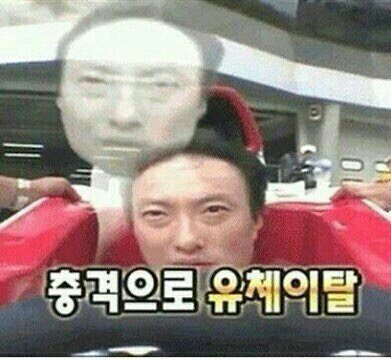

In [38]:
Image.open('bx.jpg')